In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model

In [3]:
# Paths to images and labels
image_path = r"C:\Users\gilld\OneDrive\Documents\RRC\Winter_Term_2025\COMP-3704 Neural Networks and Deep Learning\Project_Final\data\images"
label_path = r"C:\Users\gilld\OneDrive\Documents\RRC\Winter_Term_2025\COMP-3704 Neural Networks and Deep Learning\Project_Final\data\labels"

In [4]:
def load_yolo_data(image_path, label_path, target_size=(224, 224)):
    images = []
    labels = []
    for file in os.listdir(image_path):
        if file.endswith('.jpg'): 
            # Loading and preprocessing the image
            img = Image.open(os.path.join(image_path, file)).convert('RGB')
            img = img.resize(target_size)  # Resizing to target size
            images.append(np.array(img)) # Converting the image into a numpy array

            # Parsing the corresponding YOLO label file
            label_file = file.replace('.jpg', '.txt')
            with open(os.path.join(label_path, label_file), 'r') as f:
                label_data = f.read().strip().split('\n')
                # Taking only the first object in the label file
                class_ids = [int(line.split()[0]) for line in label_data]
                labels.append(class_ids[0])  # Using the first class ID for classification

    return np.array(images), np.array(labels)

In [5]:
X, y = load_yolo_data(image_path, label_path)
print(f"Loaded {len(X)} images and {len(y)} labels.")

Loaded 1049 images and 1049 labels.


In [6]:
y_plot = y
# storing in a temperory variable for help in visualizations

In [7]:
print(X)


[[[[122 123 117]
   [105 106 100]
   [142 143 137]
   ...
   [ 82  69  58]
   [120 110 102]
   [155 145 139]]

  [[123 124 116]
   [125 126 118]
   [150 151 143]
   ...
   [ 96  83  72]
   [132 121 113]
   [165 155 149]]

  [[115 117 107]
   [135 137 127]
   [148 150 140]
   ...
   [124 111 100]
   [137 127 119]
   [148 138 132]]

  ...

  [[161 178 133]
   [163 180 136]
   [166 184 139]
   ...
   [180 186 150]
   [192 198 162]
   [202 208 172]]

  [[168 180 136]
   [170 182 139]
   [178 191 147]
   ...
   [192 198 160]
   [202 208 170]
   [210 216 178]]

  [[200 208 166]
   [194 201 159]
   [192 200 158]
   ...
   [201 207 169]
   [206 212 174]
   [208 214 176]]]


 [[[117 137  40]
   [114 131  39]
   [107 112  37]
   ...
   [121 122  40]
   [135 134  57]
   [134 137  58]]

  [[116 136  39]
   [115 132  40]
   [103 106  32]
   ...
   [124 123  44]
   [128 124  50]
   [133 132  56]]

  [[108 128  31]
   [124 140  48]
   [106 107  33]
   ...
   [122 117  43]
   [127 119  49]
   [137 133

In [8]:
print(y)

[0 0 0 ... 3 3 3]


In [9]:
# Normalizing pixel values and splittung dataset
X = X / 255.0  # Normalizing to range 0-1
y = to_categorical(y, num_classes=4)  

In [10]:

# Training-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Data split complete.")


Data split complete.


In [11]:

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# Confirming that the training and testing images and lables were converted into a numpy array


In [12]:
np.unique(y_plot)


array([0, 1, 2, 3])

In [13]:
label_mapping = {
    0: "Buffalo",
    1: "Elephant",
    2: "Rhino",
    3: "Zebra"
}

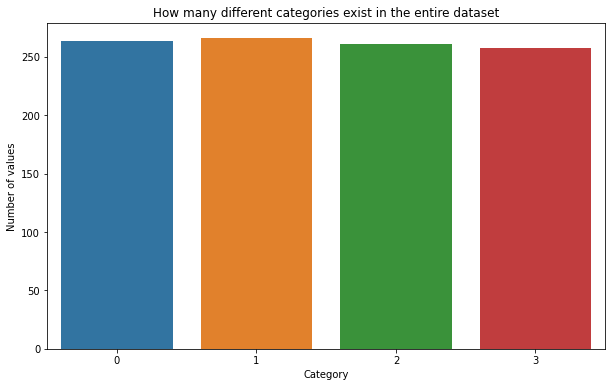

In [14]:

label = y_plot

# counting elements in each category
unique, count = np.unique(label, return_counts=True)



# plotting the barplot
plt.figure(figsize=(10,6))

sns.barplot(x = unique,y = count )
plt.xlabel('Category')
plt.ylabel("Number of values")
plt.title('How many different categories exist in the entire dataset')
plt.show()

In [15]:


model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # With four categories
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               23888000  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [16]:
print(f"Shape of y_train: {y_train.shape}")
print(f"Sample y_train: {y_train[:5]}")


Shape of y_train: (734, 4)
Sample y_train: [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)


Train on 734 samples, validate on 157 samples
Epoch 1/5
734/734 [==============================] - 28s 39ms/sample - loss: 2.4819 - accuracy: 0.3011 - val_loss: 1.2328 - val_accuracy: 0.3885
Epoch 2/5
734/734 [==============================] - 26s 36ms/sample - loss: 0.9463 - accuracy: 0.6322 - val_loss: 0.8967 - val_accuracy: 0.6306
Epoch 3/5
734/734 [==============================] - 34s 47ms/sample - loss: 0.6356 - accuracy: 0.7466 - val_loss: 0.9114 - val_accuracy: 0.5987
Epoch 4/5
734/734 [==============================] - 24s 33ms/sample - loss: 0.3543 - accuracy: 0.8896 - val_loss: 0.9641 - val_accuracy: 0.6369
Epoch 5/5
734/734 [==============================] - 26s 35ms/sample - loss: 0.1655 - accuracy: 0.9564 - val_loss: 0.9994 - val_accuracy: 0.6433


In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


158/158 [==============================] - 1s 8ms/sample - loss: 0.8884 - accuracy: 0.6456
Test Accuracy: 64.56%


In [70]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.33      0.84      0.47        37
           1       0.25      0.32      0.28        47
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        29

    accuracy                           0.29       158
   macro avg       0.14      0.29      0.19       158
weighted avg       0.15      0.29      0.19       158



c:\Users\gilld\anaconda3\envs\NN\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


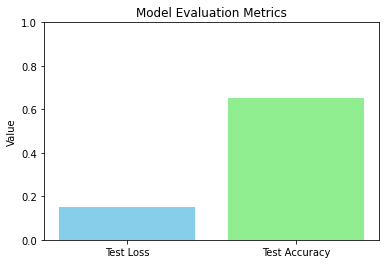

In [39]:
import matplotlib.pyplot as plt

# Example values for test_loss and test_accuracy
test_loss = 0.15  
test_accuracy = 0.65 

# Data for the bar plot
metrics = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_accuracy]

# Creating the plot
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1.0) 
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')
plt.show()


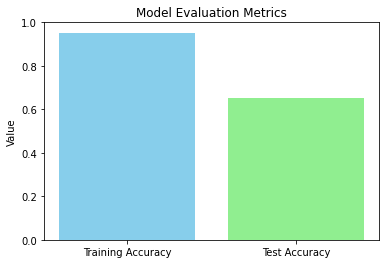

In [64]:
import matplotlib.pyplot as plt

# Example values for train_acc and test_accuracy
train_accuracy = 0.95  
test_accuracy = 0.65 

# Data for the bar plot
metrics = ['Training Accuracy', 'Test Accuracy']
values = [train_accuracy, test_accuracy]

# Creating the plot
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1.0) 
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')
plt.show()


In [20]:
model.save('african_animal_classifier.h5')


In [21]:
# Checking the predictions made
# Mapping encoded labels to category names
label_mapping = {
    0: "Buffalo",
    1: "Elephant",
    2: "Rhino",
    3: "Zebra"
}


In [22]:


# Loading the saved model
model = load_model('african_animal_classifier.h5')


In [23]:
# predictions function
def predict_image(image_path, model, label_mapping, target_size=(224, 224)):
    # Loading and preprocessing the image
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalizing to range [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Adding batch dimension

    # Predicting the label
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions, axis=1)[0]  # Getting the class index

    # Mapping the label to its category name
    category = label_mapping[predicted_label]
    confidence = predictions[0][predicted_label]

    return category, confidence


In [24]:
# Path to a random image for prediction
random_image_path = 'th.jpeg' 

# Getting the prediction and confidence score
category, confidence = predict_image(random_image_path, model, label_mapping)

print(f"Predicted Category: {category}")
print(f"Confidence Score: {confidence * 100:.2f}%")



Predicted Category: Buffalo
Confidence Score: 67.61%


(-0.5, 404.5, 259.5, -0.5)

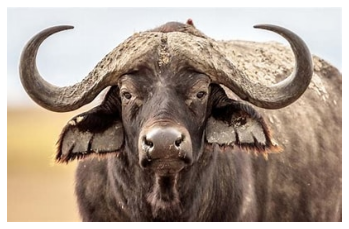

In [25]:
# showing the given image
img = Image.open('th.jpeg').convert('RGB')
plt.imshow(img)
plt.axis('off')

In [26]:
# Testing with a second image

random_image_path = 'zebra.jpeg' 

# Getting the prediction and confidence score
category, confidence = predict_image(random_image_path, model, label_mapping)

print(f"Predicted Category: {category}")
print(f"Confidence Score: {confidence * 100:.2f}%")

Predicted Category: Zebra
Confidence Score: 100.00%


(-0.5, 253.5, 233.5, -0.5)

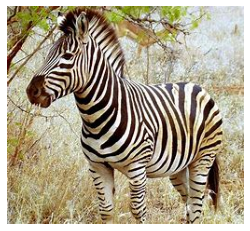

In [27]:
# showing the given image
img = Image.open('zebra.jpeg').convert('RGB')
plt.imshow(img)
plt.axis('off')

In [28]:
# Testing with a third image

random_image_path = 'elephant.jpeg' 

# Getting the prediction and confidence score
category, confidence = predict_image(random_image_path, model, label_mapping)

print(f"Predicted Category: {category}")
print(f"Confidence Score: {confidence * 100:.2f}%")

Predicted Category: Elephant
Confidence Score: 62.93%


(-0.5, 389.5, 240.5, -0.5)

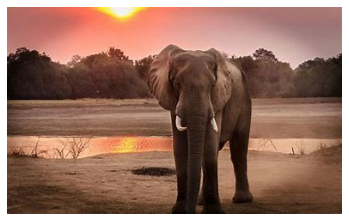

In [29]:

# showing the given image
img = Image.open('elephant.jpeg').convert('RGB')
plt.imshow(img)
plt.axis('off')

In [30]:
# Testing with a fourht image

random_image_path = 'rhino.jpeg' 

# Getting the prediction and confidence score
category, confidence = predict_image(random_image_path, model, label_mapping)

print(f"Predicted Category: {category}")
print(f"Confidence Score: {confidence * 100:.2f}%")

Predicted Category: Rhino
Confidence Score: 92.57%


(-0.5, 369.5, 246.5, -0.5)

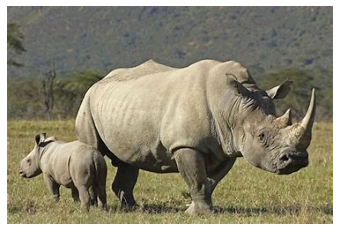

In [31]:

# showing the given image
img = Image.open('rhino.jpeg').convert('RGB')
plt.imshow(img)
plt.axis('off')

In [32]:
# Testing with a third image

random_image_path = 'zebra_back.jpg' 

# Getting the prediction and confidence score
category, confidence = predict_image(random_image_path, model, label_mapping)

print(f"Predicted Category: {category}")
print(f"Confidence Score: {confidence * 100:.2f}%")

Predicted Category: Elephant
Confidence Score: 37.28%


(-0.5, 3839.5, 2159.5, -0.5)

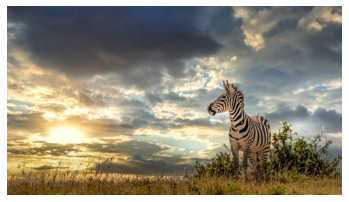

In [33]:

# showing the given image
img = Image.open('zebra_back.jpg').convert('RGB')
plt.imshow(img)
plt.axis('off')

### Improving the model to get better accuracies.

#

In [34]:
# Enhanced CNN architecture
from tensorflow.keras.layers import BatchNormalization, Dropout, GlobalAveragePooling2D

model_2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


In [35]:
# data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)



In [36]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history_2= model_2.fit(datagen.flow(X_train, y_train), epochs=5, validation_data=(X_val, y_val))


  ...
    to  
  ['...']
Train for 23 steps, validate on 157 samples
Epoch 1/5
23/23 [==============================] - 42s 2s/step - loss: 1.2637 - accuracy: 0.3842 - val_loss: 1.3927 - val_accuracy: 0.2675
Epoch 2/5
23/23 [==============================] - 40s 2s/step - loss: 1.1124 - accuracy: 0.4973 - val_loss: 1.4556 - val_accuracy: 0.1847
Epoch 3/5
23/23 [==============================] - 38s 2s/step - loss: 1.0683 - accuracy: 0.5191 - val_loss: 1.4558 - val_accuracy: 0.1847
Epoch 4/5
23/23 [==============================] - 39s 2s/step - loss: 0.9885 - accuracy: 0.5695 - val_loss: 1.5893 - val_accuracy: 0.2038
Epoch 5/5
23/23 [==============================] - 39s 2s/step - loss: 0.9576 - accuracy: 0.5681 - val_loss: 1.4912 - val_accuracy: 0.1975


In [42]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

158/158 [==============================] - 2s 10ms/sample - loss: 1.4504 - accuracy: 0.2785
Test Accuracy: 27.85%


In [71]:


y_pred = model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        47
           2       0.29      0.98      0.45        45
           3       0.62      0.17      0.27        29

    accuracy                           0.31       158
   macro avg       0.23      0.29      0.18       158
weighted avg       0.20      0.31      0.18       158



c:\Users\gilld\anaconda3\envs\NN\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


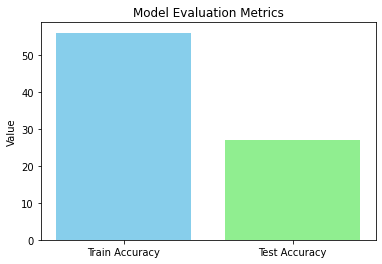

In [66]:
import matplotlib.pyplot as plt

# Example values for training accu and test_accuracy
train_accuracy =   56
test_accuracy = 27

# Data for the bar plot
metrics = ['Train Accuracy', 'Test Accuracy']
values = [train_accuracy, test_accuracy]

# Creating the plot
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
# plt.ylim(0, 1.0) 
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')
plt.show()


In [67]:
# making prediction on the image misclassified by the previous model
# Testing with a zebra image with background

random_image_path = 'zebra_back.jpg' 

# Getting the prediction and confidence score
category, confidence = predict_image(random_image_path, model_2, label_mapping)

print(f"Predicted Category: {category}")
print(f"Confidence Score: {confidence * 100:.2f}%")

Predicted Category: Rhino
Confidence Score: 50.71%


### Using a pretrained model: MobileNetV2

In [50]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base layers initially

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

model_pret = Model(inputs=base_model.input, outputs=predictions)


In [52]:
model_pret.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Using augmented data for a pretrained model

history_pret= model_pret.fit(datagen.flow(X_train, y_train), epochs=5, validation_data=(X_val, y_val))

  ...
    to  
  ['...']
Train for 23 steps, validate on 157 samples
Epoch 1/5
23/23 [==============================] - 53s 2s/step - loss: 0.4981 - accuracy: 0.8202 - val_loss: 0.2074 - val_accuracy: 0.9427
Epoch 2/5
23/23 [==============================] - 50s 2s/step - loss: 0.3447 - accuracy: 0.8733 - val_loss: 0.1258 - val_accuracy: 0.9745
Epoch 3/5
23/23 [==============================] - 49s 2s/step - loss: 0.3244 - accuracy: 0.8883 - val_loss: 0.1515 - val_accuracy: 0.9554
Epoch 4/5
23/23 [==============================] - 49s 2s/step - loss: 0.3287 - accuracy: 0.8951 - val_loss: 0.1532 - val_accuracy: 0.9618
Epoch 5/5
23/23 [==============================] - 48s 2s/step - loss: 0.2730 - accuracy: 0.9060 - val_loss: 0.1296 - val_accuracy: 0.9554


In [56]:
test_loss, test_accuracy = model_pret.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

158/158 [==============================] - 3s 20ms/sample - loss: 0.1484 - accuracy: 0.9367
Test Accuracy: 93.67%


In [72]:
from sklearn.metrics import classification_report

y_pred = model_pret.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       0.93      0.89      0.91        47
           2       0.95      0.89      0.92        45
           3       1.00      1.00      1.00        29

    accuracy                           0.94       158
   macro avg       0.94      0.95      0.94       158
weighted avg       0.94      0.94      0.94       158



In [61]:
train_loss, train_accuracy = model_pret.evaluate(X_train, y_train)

734/734 [==============================] - 13s 18ms/sample - loss: 0.1475 - accuracy: 0.9564


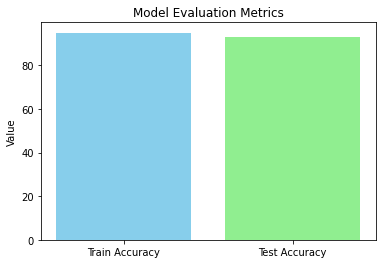

In [63]:




# Data for the bar plot
metrics = ['Train Accuracy', 'Test Accuracy']
values = [95, 93]

# Creating the plot
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'])
# plt.ylim(0, 1.0) 
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')
plt.show()

Training accuracy is nearly equal to testing accuracy, so our model is no more overfitting.

(-0.5, 3839.5, 2159.5, -0.5)

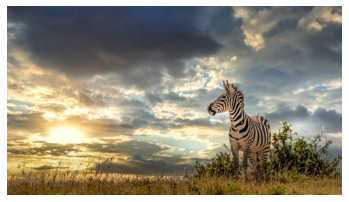

In [73]:

# showing the image of zebra with some background
img = Image.open('zebra_back.jpg').convert('RGB')
plt.imshow(img)
plt.axis('off')

In [68]:
# making prediction on the image misclassified by the previous two models
# Testing with a zebra image with background

random_image_path = 'zebra_back.jpg' 

# Getting the prediction and confidence score
category, confidence = predict_image(random_image_path, model_pret, label_mapping)

print(f"Predicted Category: {category}")
print(f"Confidence Score: {confidence * 100:.2f}%")

Predicted Category: Zebra
Confidence Score: 99.87%


This model correclty classified the image misclassified by the previous models.

In [69]:
model_pret.save('african_animal_classifier_pretrained.h5')
#Saving the final model

### Now using streamlit

In [78]:
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model('african_animal_classifier_pretrained.h5')

# Define class names
class_names = ['Buffalo', 'Elephant', 'Rhino', 'Zebra']  

# Streamlit app
st.title("Wildlife Detection App")

uploaded_file = st.file_uploader("Upload an animal image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    
    # Preprocessing
    image = image.resize((224, 224))  # Same size used during training
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch

    # Prediction
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    st.write(f"Prediction: **{predicted_class}**")
    st.write(f"Confidence: **{confidence:.2f}%**")


2025-04-23 07:15:00.049 
  command:

    streamlit run c:\Users\gilld\anaconda3\envs\NN\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]



![Screenshot 2025-04-23 073607.png](<attachment:Screenshot 2025-04-23 073607.png>)
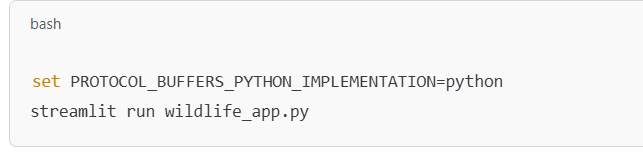

The above command was run inside the anaconda terminal in the working directory, the file had to be python file (wildlife_detection.py) 

![Screenshot 2025-04-23 073925.png](<attachment:Screenshot 2025-04-23 073925.png>)
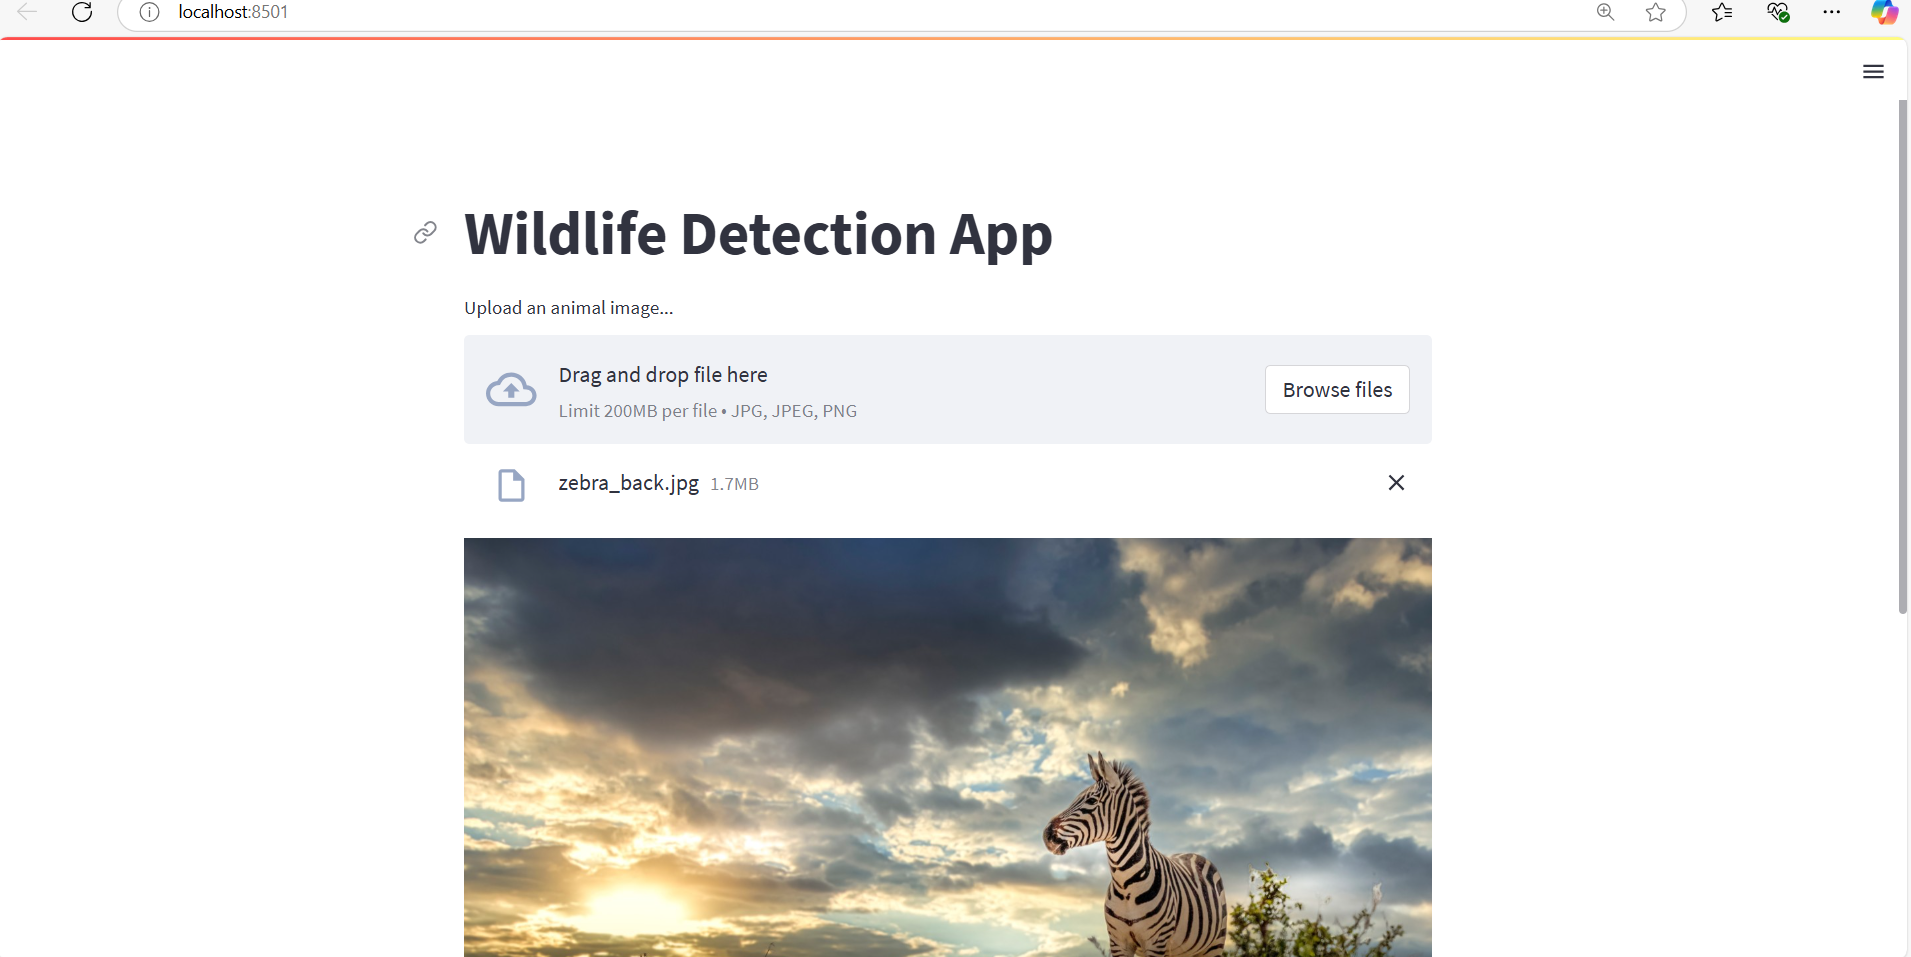

![Screenshot 2025-04-23 074012.png](<attachment:Screenshot 2025-04-23 074012.png>)
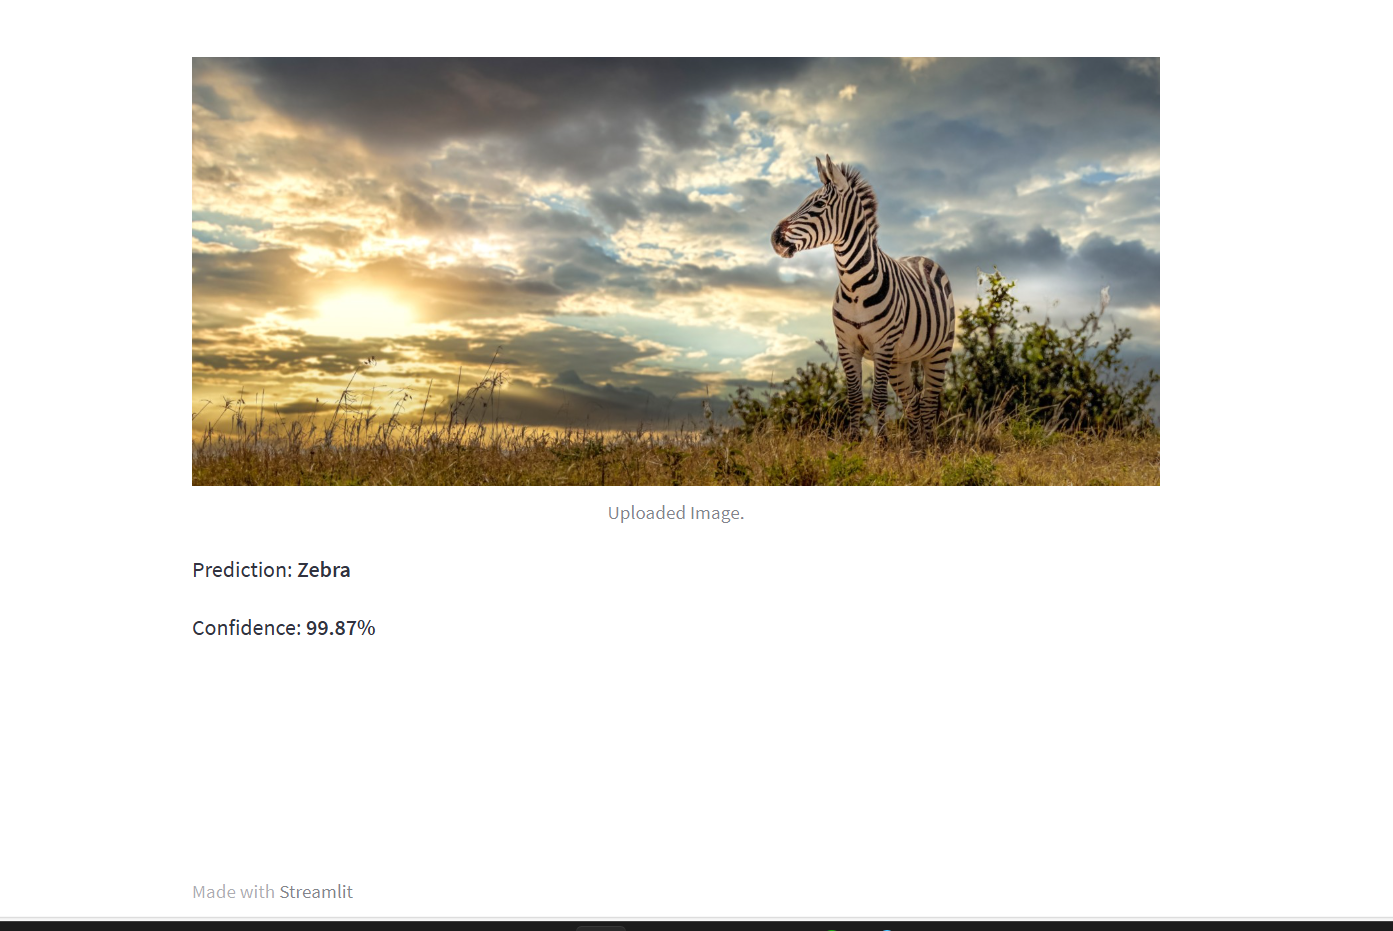

Predicting the second image

![Screenshot 2025-04-23 074328.png](<attachment:Screenshot 2025-04-23 074328.png>)
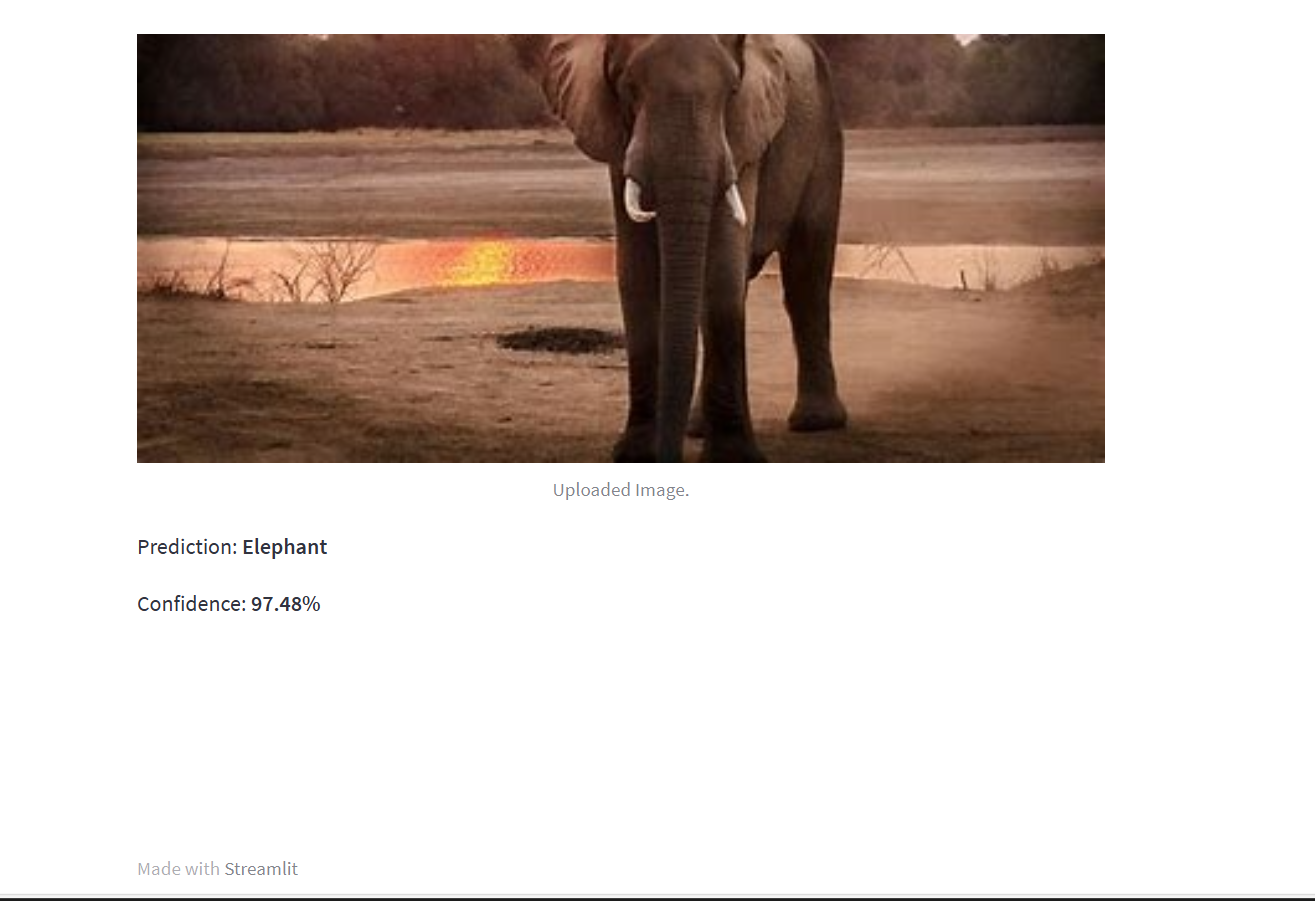